In [1]:
from functions import * # importing our own functions defined in functions.py

import matplotlib.pyplot as plt
plt.style.use(['classic'])
plt.rcParams['figure.facecolor'] = 'white'

/Users/sheilaalemany/miniforge3/envs/m1ai/lib/python3.9/site-packages/art/estimators/certification/__init__.py:13: UserWarning: PyTorch not found. Not importing DeepZ functionality
  warnings.warn("PyTorch not found. Not importing DeepZ functionality")


For our evaluation, we are using the Adversarial Robustness Toolbox found [here](https://adversarial-robustness-toolbox.readthedocs.io/en/latest/).

# Importing MNIST

In [2]:
from art.utils import load_dataset
(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset(str("mnist"))

# Training Classifiers

## Generalized Gamma

In [3]:
@tf.custom_gradient
def gamma_activation(x):
    def grad(dy):
        return gamma_derivative(x) * dy

    result = generalized_gamma(x)
    return result, grad

In [4]:
model = define_model(gamma_activation)
classifier = train_model(model, x_train, y_train, x_test, y_test, eps=15)


...created classifier
Before training time (EST):  2023-05-17 13:24:30.167904-05:00
...finished training
Time after training finished:  2023-05-17 13:30:09.909965-05:00
Test accuracy: 90.70%



In [5]:
eval_x_test, eval_y_test = get_successful_test(classifier, x_test, y_test)


Original test accuracy: 90.70%
(1000, 28, 28, 1)
(1000, 10)
Test set of correctly predicted (benign): 100.00%


## ReLU

In [6]:
model_relu = define_model(tf.nn.relu)
classifier_relu = train_model(model_relu, x_train, y_train, x_test, y_test, eps=10)


...created classifier
Before training time (EST):  2023-05-17 13:30:12.156616-05:00
...finished training
Time after training finished:  2023-05-17 13:32:04.138283-05:00
Test accuracy: 97.91%



In [7]:
eval_x_test_relu, eval_y_test_relu = get_successful_test(classifier_relu, x_test, y_test)


Original test accuracy: 97.91%
(1000, 28, 28, 1)
(1000, 10)
Test set of correctly predicted (benign): 100.00%


## Tanh

In [8]:
model_tanh = define_model(tf.nn.tanh)
classifier_tanh = train_model(model_tanh, x_train, y_train, x_test, y_test, eps=10)


...created classifier
Before training time (EST):  2023-05-17 13:32:05.395493-05:00
...finished training
Time after training finished:  2023-05-17 13:33:57.233883-05:00
Test accuracy: 96.73%



In [9]:
eval_x_test_tanh, eval_y_test_tanh = get_successful_test(classifier_tanh, x_test, y_test)

Original test accuracy: 96.73%
(1000, 28, 28, 1)
(1000, 10)
Test set of correctly predicted (benign): 100.00%


## Swish

In [10]:
model_swish = define_model(tf.keras.activations.swish)
classifier_swish = train_model(model_swish, x_train, y_train, x_test, y_test, eps=10)


...created classifier
Before training time (EST):  2023-05-17 13:33:58.582077-05:00
...finished training
Time after training finished:  2023-05-17 13:36:06.630405-05:00
Test accuracy: 97.55%



In [11]:
eval_x_test_swish, eval_y_test_swish = get_successful_test(classifier_swish, x_test, y_test)


Original test accuracy: 97.55%
(1000, 28, 28, 1)
(1000, 10)
Test set of correctly predicted (benign): 100.00%


## Tent Activation

In [12]:
# @tf.custom_gradient
# def tent_activation_func(x):
#     def grad(dy):
#         return tent_derivative(x)*dy

#     result = tent_activation(x)
#     return result, grad

In [13]:
# model_tent = define_model(tent_activation_func)
# classifier_tent = train_model(model_tent, x_train, y_train, x_test, y_test, eps=25)


In [14]:
# eval_x_test_tent, eval_y_test_tent = get_successful_test(classifier_tent, x_test, y_test)


# Attacking Models

## Fast Gradient Sign

In [15]:
fgsm_results_gengamma = []
fgsm_results_relu = []
fgsm_results_tanh = []
fgsm_results_swish = []

eps = np.linspace(0, 0.5, 20)
for epsilon in eps:
    fgsm_results_gengamma += [fgsm_attack(classifier, eval_x_test, eval_y_test, eps=epsilon)]
    fgsm_results_relu += [fgsm_attack(classifier_relu, eval_x_test_relu, eval_y_test_relu, eps=epsilon)]
    fgsm_results_tanh += [fgsm_attack(classifier_tanh, eval_x_test_tanh, eval_y_test_tanh, eps=epsilon)]
    fgsm_results_swish += [fgsm_attack(classifier_swish, eval_x_test_swish, eval_y_test_swish, eps=epsilon)]

    print("eps "+str(epsilon)+" done")

eps 0.0 done
eps 0.02631578947368421 done
eps 0.05263157894736842 done
eps 0.07894736842105263 done
eps 0.10526315789473684 done
eps 0.13157894736842105 done
eps 0.15789473684210525 done
eps 0.18421052631578946 done
eps 0.21052631578947367 done
eps 0.23684210526315788 done
eps 0.2631578947368421 done
eps 0.2894736842105263 done
eps 0.3157894736842105 done
eps 0.3421052631578947 done
eps 0.3684210526315789 done
eps 0.39473684210526316 done
eps 0.42105263157894735 done
eps 0.4473684210526315 done
eps 0.47368421052631576 done
eps 0.5 done


In [16]:
print('FGSM GenGamma:\n', fgsm_results_gengamma)
print('FGSM ReLU:\n', fgsm_results_relu)
print('FGSM Tanh:\n', fgsm_results_tanh)
print('FGSM Swish:\n', fgsm_results_swish)

FGSM GenGamma:
 [100.0, 95.3, 88.1, 77.3, 64.2, 45.7, 28.4, 17.299999999999997, 12.1, 8.3, 5.8999999999999995, 4.2, 3.4000000000000004, 3.1, 2.4, 2.1999999999999997, 1.9, 1.7000000000000002, 1.4000000000000001, 1.4000000000000001]
FGSM ReLU:
 [100.0, 95.7, 84.1, 62.0, 43.1, 29.9, 17.4, 9.1, 5.1, 2.6, 1.4000000000000001, 1.0999999999999999, 0.8999999999999999, 0.8, 0.8, 0.7000000000000001, 0.7000000000000001, 0.5, 0.5, 0.5]
FGSM Tanh:
 [100.0, 93.2, 79.60000000000001, 54.1, 37.5, 24.9, 16.3, 10.100000000000001, 6.4, 4.2, 2.4, 1.9, 1.3, 0.8999999999999999, 0.4, 0.3, 0.2, 0.1, 0.0, 0.0]
FGSM Swish:
 [100.0, 95.1, 84.7, 60.8, 42.199999999999996, 27.3, 15.2, 8.799999999999999, 4.6, 2.6, 1.6, 1.4000000000000001, 1.0, 0.8999999999999999, 0.8999999999999999, 0.8999999999999999, 0.8, 0.8, 0.7000000000000001, 0.6]


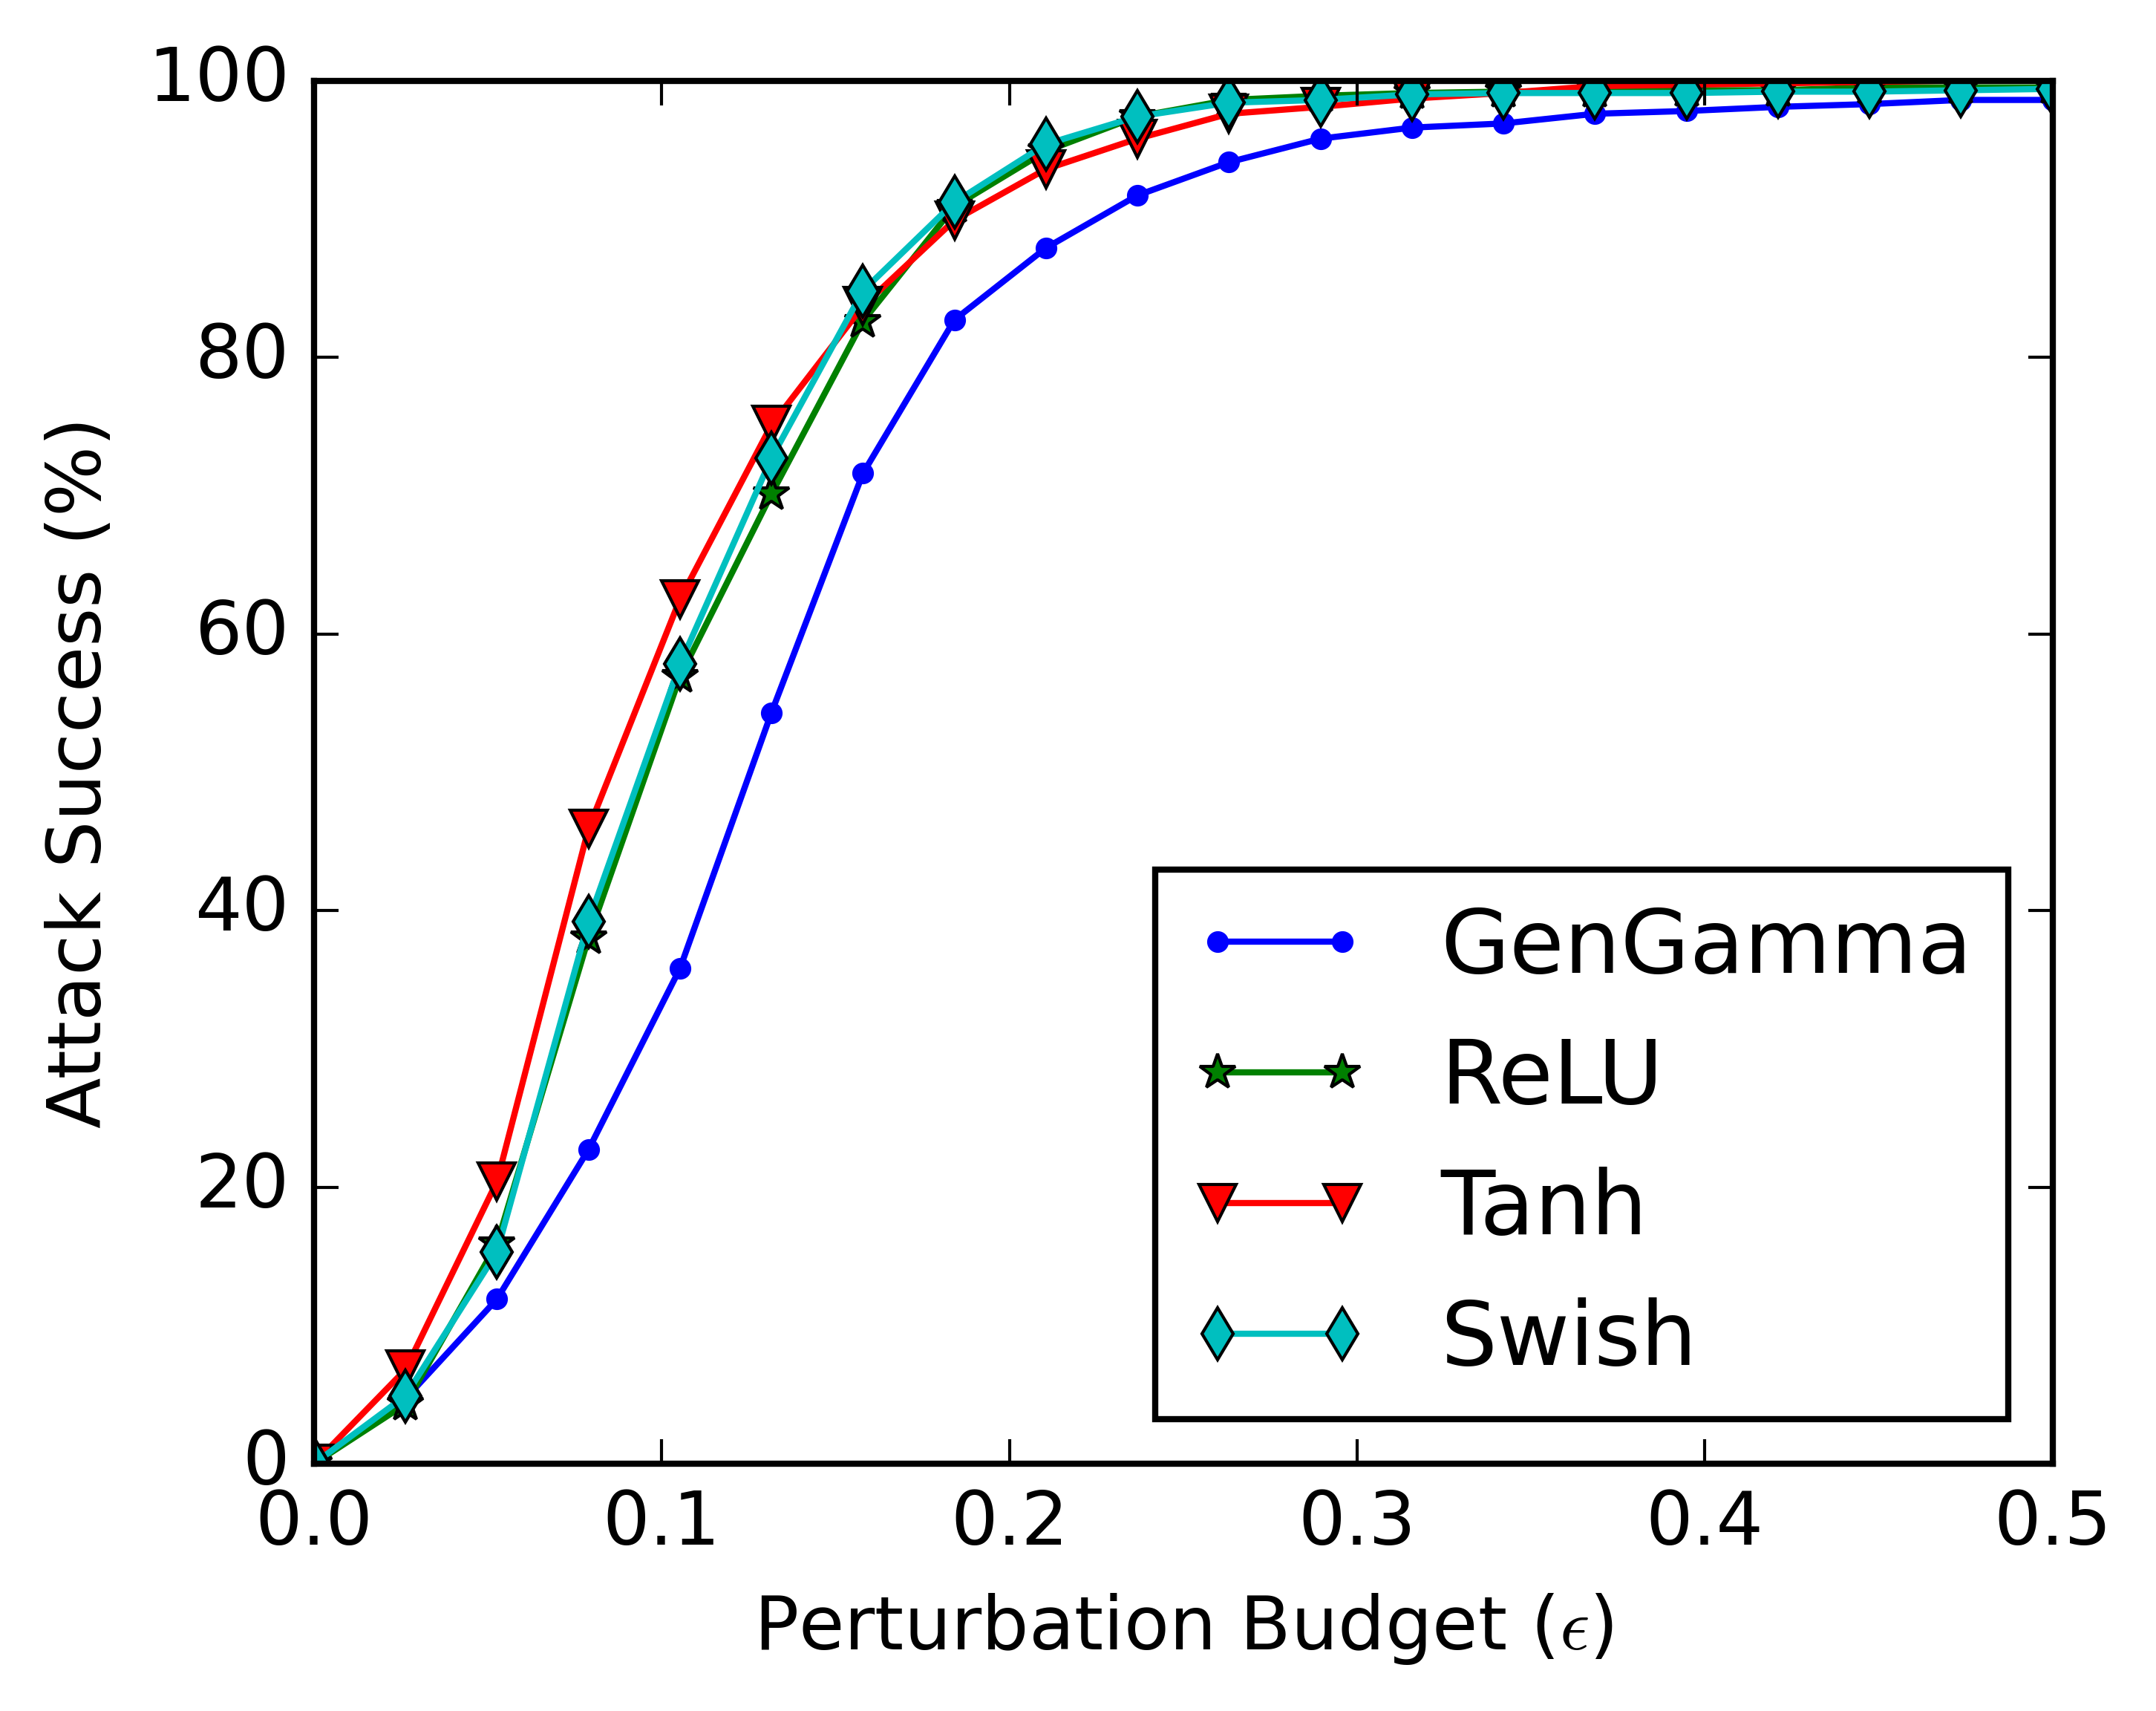

In [23]:
eps = np.linspace(0, 0.5, 20)

plt.figure(figsize=(5,4), dpi=600)
plt.plot(eps, attack_success(fgsm_results_gengamma), label='GenGamma', marker='.')
plt.plot(eps, attack_success(fgsm_results_relu), label='ReLU', marker='*')
plt.plot(eps, attack_success(fgsm_results_tanh), label='Tanh', marker='v')
plt.plot(eps, attack_success(fgsm_results_swish), label='Swish', marker='d')

plt.legend(loc='lower right')
axes = plt.gca()
axes.set_ylim([0, 100])
plt.xlabel('Perturbation Budget ($\epsilon$)')
plt.ylabel('Attack Success (%)')
plt.tight_layout()
plt.savefig('images/fgsm_results_lenet_mnist.png', dpi=600)
plt.show()

## PGD

In [18]:
pgd_results_gengamma = []
pgd_results_relu = []
pgd_results_tanh = []
pgd_results_swish = []

eps = np.linspace(0, 0.30, 15)
for epsilon in eps:
    pgd_results_gengamma += [pgd_attack(classifier, eval_x_test, eval_y_test, eps=epsilon)]
    pgd_results_relu += [pgd_attack(classifier_relu, eval_x_test_relu, eval_y_test_relu, eps=epsilon)]
    pgd_results_tanh += [pgd_attack(classifier_tanh, eval_x_test_tanh, eval_y_test_tanh, eps=epsilon)]
    pgd_results_swish += [pgd_attack(classifier_swish, eval_x_test_swish, eval_y_test_swish, eps=epsilon)]

    print("eps "+str(epsilon)+" done")

eps 0.0 done
eps 0.02142857142857143 done
eps 0.04285714285714286 done
eps 0.06428571428571428 done
eps 0.08571428571428572 done
eps 0.10714285714285715 done
eps 0.12857142857142856 done
eps 0.15 done
eps 0.17142857142857143 done
eps 0.19285714285714287 done
eps 0.2142857142857143 done
eps 0.2357142857142857 done
eps 0.2571428571428571 done
eps 0.2785714285714286 done
eps 0.3 done


In [19]:
print(pgd_results_gengamma)
print(pgd_results_relu)
print(pgd_results_tanh)
print(pgd_results_swish)

[100.0, 96.6, 91.2, 83.1, 72.2, 55.800000000000004, 33.7, 19.2, 7.6, 3.6999999999999997, 2.1999999999999997, 0.8999999999999999, 0.3, 0.1, 0.1]
[100.0, 96.6, 88.7, 72.0, 50.7, 35.5, 21.4, 11.799999999999999, 6.2, 2.6, 1.4000000000000001, 0.7000000000000001, 0.5, 0.0, 0.0]
[100.0, 95.5, 84.2, 56.99999999999999, 39.4, 23.9, 12.9, 5.0, 2.0, 1.0999999999999999, 0.2, 0.2, 0.2, 0.1, 0.0]
[100.0, 96.6, 90.0, 72.39999999999999, 50.5, 34.599999999999994, 21.7, 11.5, 5.2, 2.6, 1.0999999999999999, 0.3, 0.0, 0.0, 0.0]


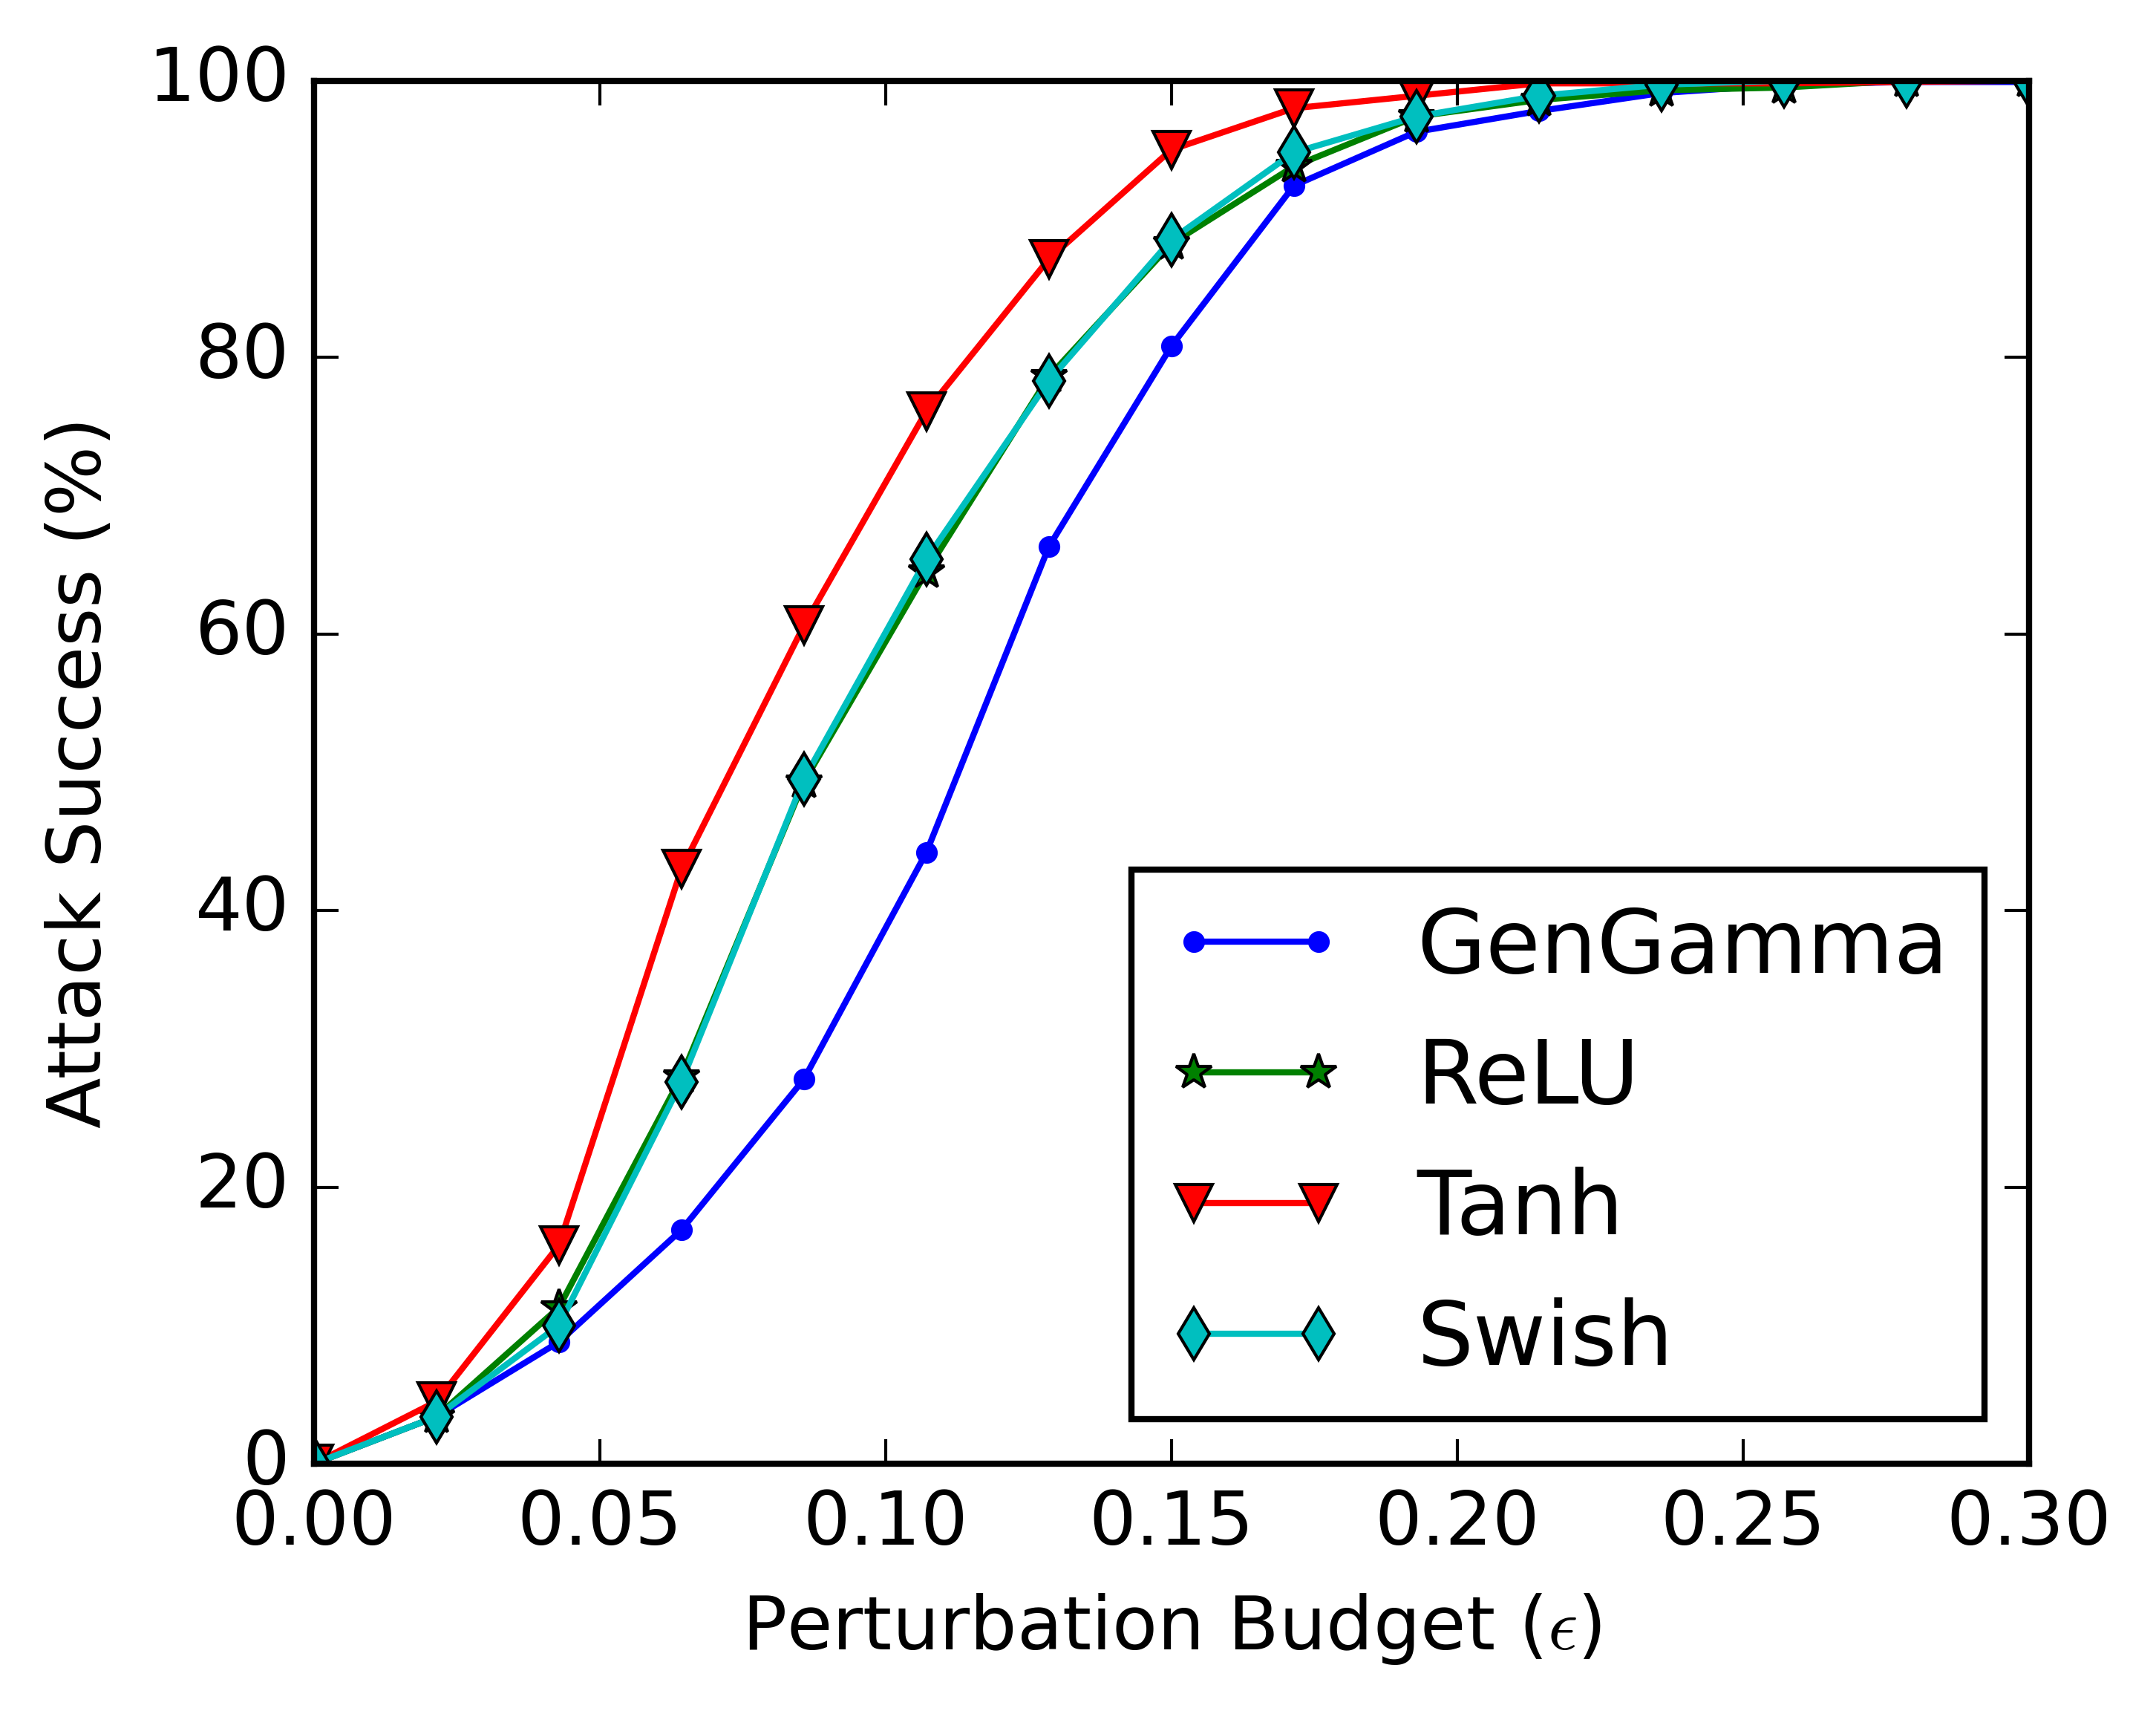

In [25]:
eps = np.linspace(0, 0.30, 15)
plt.figure(figsize=(5,4), dpi=600)

plt.plot(eps, attack_success(pgd_results_gengamma), label='GenGamma', marker='.')
plt.plot(eps, attack_success(pgd_results_relu), label='ReLU', marker='*')
plt.plot(eps, attack_success(pgd_results_tanh), label='Tanh', marker='v')
plt.plot(eps, attack_success(pgd_results_swish), label='Swish', marker='d')

plt.legend(loc='lower right')
axes = plt.gca()
axes.set_ylim([0, 100])
plt.xlabel('Perturbation Budget ($\epsilon$)')
plt.ylabel('Attack Success (%)')
plt.tight_layout()
plt.savefig('images/pgd_results_lenet_mnist.png', dpi=600)
plt.show()

## Carlini & Wagner L2/inf

In [27]:
## want a smaller eval size due to computational constraints
def get_successful_test(classifier, x_test, y_test):
    preds = np.argmax(classifier.predict(x_test), axis=1)
    acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    print("Original test accuracy: %.2f%%" % (acc * 100))
    
    preds = np.argmax(classifier.predict(x_test), axis=1)
    correct = np.nonzero(preds == np.argmax(y_test, axis=1))

    eval_x_test = x_test[correct]
    eval_y_test = y_test[correct]

    eval_x_test_final = eval_x_test[:100]
    print(eval_x_test_final.shape)
    eval_y_test_final = eval_y_test[:100]
    print(eval_y_test_final.shape)
    
    preds = np.argmax(classifier.predict(eval_x_test_final), axis=1)
    acc = np.sum(preds == np.argmax(eval_y_test_final, axis=1)) / eval_y_test_final.shape[0]
    print("Test set of correctly predicted (benign): %.2f%%" % (acc * 100))
    
    return eval_x_test_final, eval_y_test_final

eval_x_test_gengamma, eval_y_test_gengamma = get_successful_test(classifier, x_test, y_test)
eval_x_test_relu, eval_y_test_relu = get_successful_test(classifier_relu, x_test, y_test)
eval_x_test_tanh, eval_y_test_tanh = get_successful_test(classifier_tanh, x_test, y_test)
eval_x_test_swish, eval_y_test_swish = get_successful_test(classifier_swish, x_test, y_test)

print(eval_x_test_gengamma.shape)

Original test accuracy: 90.70%
(100, 28, 28, 1)
(100, 10)
Test set of correctly predicted (benign): 100.00%
Original test accuracy: 97.91%
(100, 28, 28, 1)
(100, 10)
Test set of correctly predicted (benign): 100.00%
Original test accuracy: 96.73%
(100, 28, 28, 1)
(100, 10)
Test set of correctly predicted (benign): 100.00%
Original test accuracy: 97.55%
(100, 28, 28, 1)
(100, 10)
Test set of correctly predicted (benign): 100.00%
(100, 28, 28, 1)


In [28]:
cw_results_gengamma = []
cw_results_relu = []
cw_results_tanh = []
cw_results_swish = []

eps = np.linspace(0, 0.4, 4)
for epsilon in eps:
    cw_results_gengamma += [cwl2_attack(classifier, eval_x_test_gengamma, eval_y_test_gengamma, eps=epsilon)]
    cw_results_relu += [cwl2_attack(classifier_relu, eval_x_test_relu, eval_y_test_relu, eps=epsilon)]
    cw_results_tanh += [cwl2_attack(classifier_tanh, eval_x_test_tanh, eval_y_test_tanh, eps=epsilon)]
    cw_results_swish += [cwl2_attack(classifier_swish, eval_x_test_swish, eval_y_test_swish, eps=epsilon)]

    print("eps "+str(epsilon)+" done")

...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 79.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 87.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 84.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 82.00%
eps 0.0 done
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 80.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 87.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 86.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 82.00%
eps 0.13333333333333333 done
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 86.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 87.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 86.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 83.00%
eps 0.26666666666666666 done
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 90.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 87.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 86.00%
...creating adversarial examples


C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy on adversarial sample: 84.00%
eps 0.4 done


In [29]:
print(cw_results_gengamma)
print(cw_results_relu)
print(cw_results_tanh)
print(cw_results_swish)

[79.0, 80.0, 86.0, 90.0]
[87.0, 87.0, 87.0, 87.0]
[84.0, 86.0, 86.0, 86.0]
[82.0, 82.0, 83.0, 84.0]
